In [84]:
import pandas as pd
import json
import networkx as nx
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import powerlaw
from scipy.optimize import curve_fit

# Prepare categories for nodes

In [144]:
G = pickle.load(open('Graph/unsigned_graph.pickle','rb'))

In [145]:
videos = pd.read_json('Data/complete_videos_metadata.jsonl',lines=True,encoding='utf-8')

In [146]:
video_index=pickle.load(open('Graph/video_index','rb'))

In [147]:
len(G.edges)

15142389

In [148]:
for video in videos.to_dict(orient='records'):
    try:
        G.nodes[video_index[video['videoId']]]['category'] = int(video['category'])
    except:
        print(f'No comment for video {video["videoId"]}')

No comment for video iIg9gI_AZwM
No comment for video Dkkp4KfdGPY
No comment for video iwNMxMIpLw4
No comment for video OjlaUkllTss
No comment for video slEbTbjkNAs
No comment for video xcdlTH2FZEo
No comment for video h2O-zrAxMCM
No comment for video qb33_PnPz8A
No comment for video UiqiHnIUGEs
No comment for video bkWE0m-cHoU
No comment for video A7NW4j_OF4A
No comment for video tm0JL5rzcs0
No comment for video o3hUmyc08Oc
No comment for video E1I73Paxn1A
No comment for video VwHYmfwDzUA
No comment for video BC5prSwWQoc
No comment for video UhjcNb3Ld9k
No comment for video oNBs3X-enRI
No comment for video 2WrrAufEV68
No comment for video B5i0d3DJe7w
No comment for video DygUH4Hcna0
No comment for video Rhk1d-jSogg
No comment for video PVyeUQHgbcg
No comment for video Zjw_bGf5_zg
No comment for video 8CYcZrnaIKw
No comment for video UJtl7XMOutE
No comment for video mzY9wxdqO7Q
No comment for video 7skL7s6s8bw
No comment for video tO-BulyycnY
No comment for video ky-Uay8DAos
No comment

In [149]:
communities = {}
for node in G.nodes:
    if not G.nodes[node]['category'] in communities:
        communities[G.nodes[node]['category']]=set()
    communities[G.nodes[node]['category']].add(node)

## Analysis

Graph components

In [150]:
n_cc = nx.number_connected_components(G)

In [151]:
connected_components = nx.connected_components(G)

In [152]:
component_lengths = []
components=[]
for component in connected_components:
    component_lengths.append(len(component))
    components.append(component)

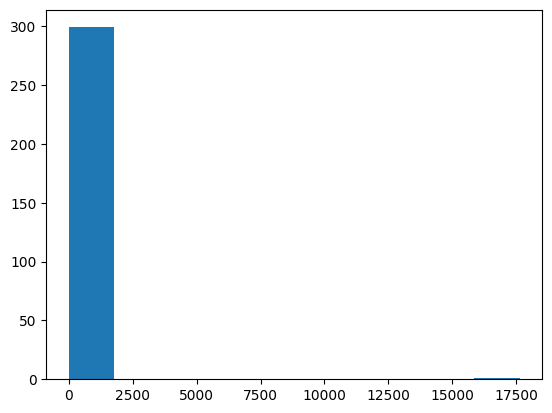

In [153]:
plt.hist(component_lengths)
plt.show()

In [154]:
for component in components:
    if len(component) <10:
        G.remove_nodes_from(component)

Power law

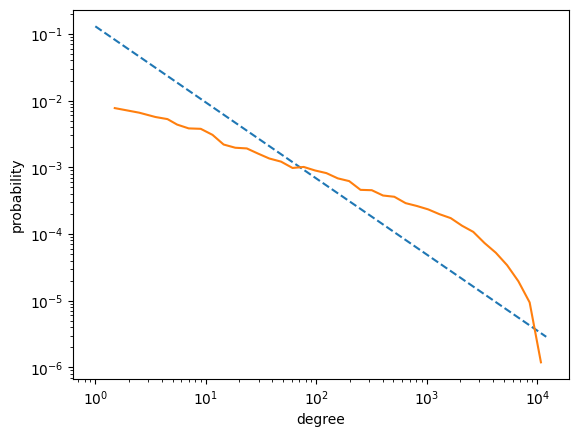

In [159]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes() if G.degree(n) if G.degree(n)]
    fit = powerlaw.Fit(np.array(degrees),xmin=1,discrete=True,discrete_approximation='xmax')
    fit.power_law.plot_pdf(linestyle='--',label='fit ccdf')
    fit.plot_pdf()
    plt.xlabel('degree')
    plt.ylabel('probability')
    return fit
    
fit = plot_degree_dist(G)

Clustering

In [ ]:
clusters = nx.clustering(G)
avg_clustering =  nx.average_clustering(G)

In [ ]:
plt.hist(clusters.values())
plt.show()

Centrality

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G,k=1000)

Assortativeness

In [ ]:
attribute_assortativeness = nx.attribute_assortativity_coefficient(G,'category')
degree_assortativeness = nx.degree_assortativity_coefficient(G)